In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'train.csv'
data = pd.read_csv(file_path)
data_bu = data.copy()


# Step 1: Display Head and Tail of the dataset
print("Head of the dataset:")
print(data.head())
print("\nTail of the dataset:")
print(data.tail())


Head of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008  

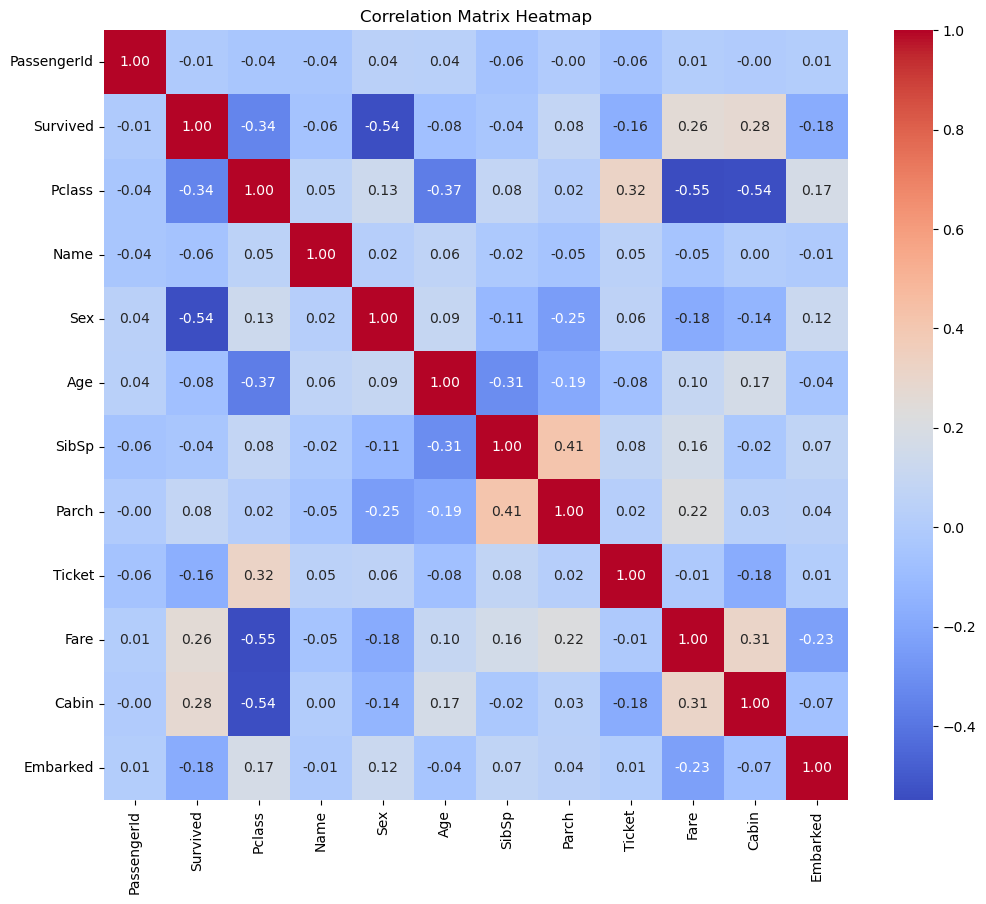

In [2]:

# Step 2: Display Info and Summary Statistics
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Check Data Types
print("\nData Types:")
print(data.dtypes)

# Step 4: Encode Categorical Variables and Find Correlation
# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Calculate correlation on the encoded data
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [3]:

# Step 5: Drop Less Relevant Columns
# Retain only relevant columns based on correlation analysis
columns_to_keep = ['Sex', 'Pclass', 'Fare', 'Cabin']
data = data[columns_to_keep]

# Step 6: Check for Null Values
def check_nulls(data):
    print("\nNull Values:")
    print(data.isnull().sum())

check_nulls(data)



Null Values:
Sex       0
Pclass    0
Fare      0
Cabin     0
dtype: int64


In [4]:

# Step 7: Handle Missing Values
# Drop rows where more than 50% of the columns are null
data = data.dropna(thresh=data.shape[1] * 0.5, axis=0)
data = data.fillna(data.mean())
data

,Sex,Pclass,Fare,Cabin
0,1,3,7.2500,-1
1,0,1,71.2833,81
2,0,3,7.9250,-1
3,0,1,53.1000,55
4,1,3,8.0500,-1
...,...,...,...,...
886,1,2,13.0000,-1
887,0,1,30.0000,30
888,0,3,23.4500,-1
889,1,1,30.0000,60


In [5]:

# Fill remaining missing values with mean for numeric columns or mode for categorical
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == np.number:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Re-check for null values
check_nulls(data)



Null Values:
Sex       0
Pclass    0
Fare      0
Cabin     0
dtype: int64



Plotting Histograms...


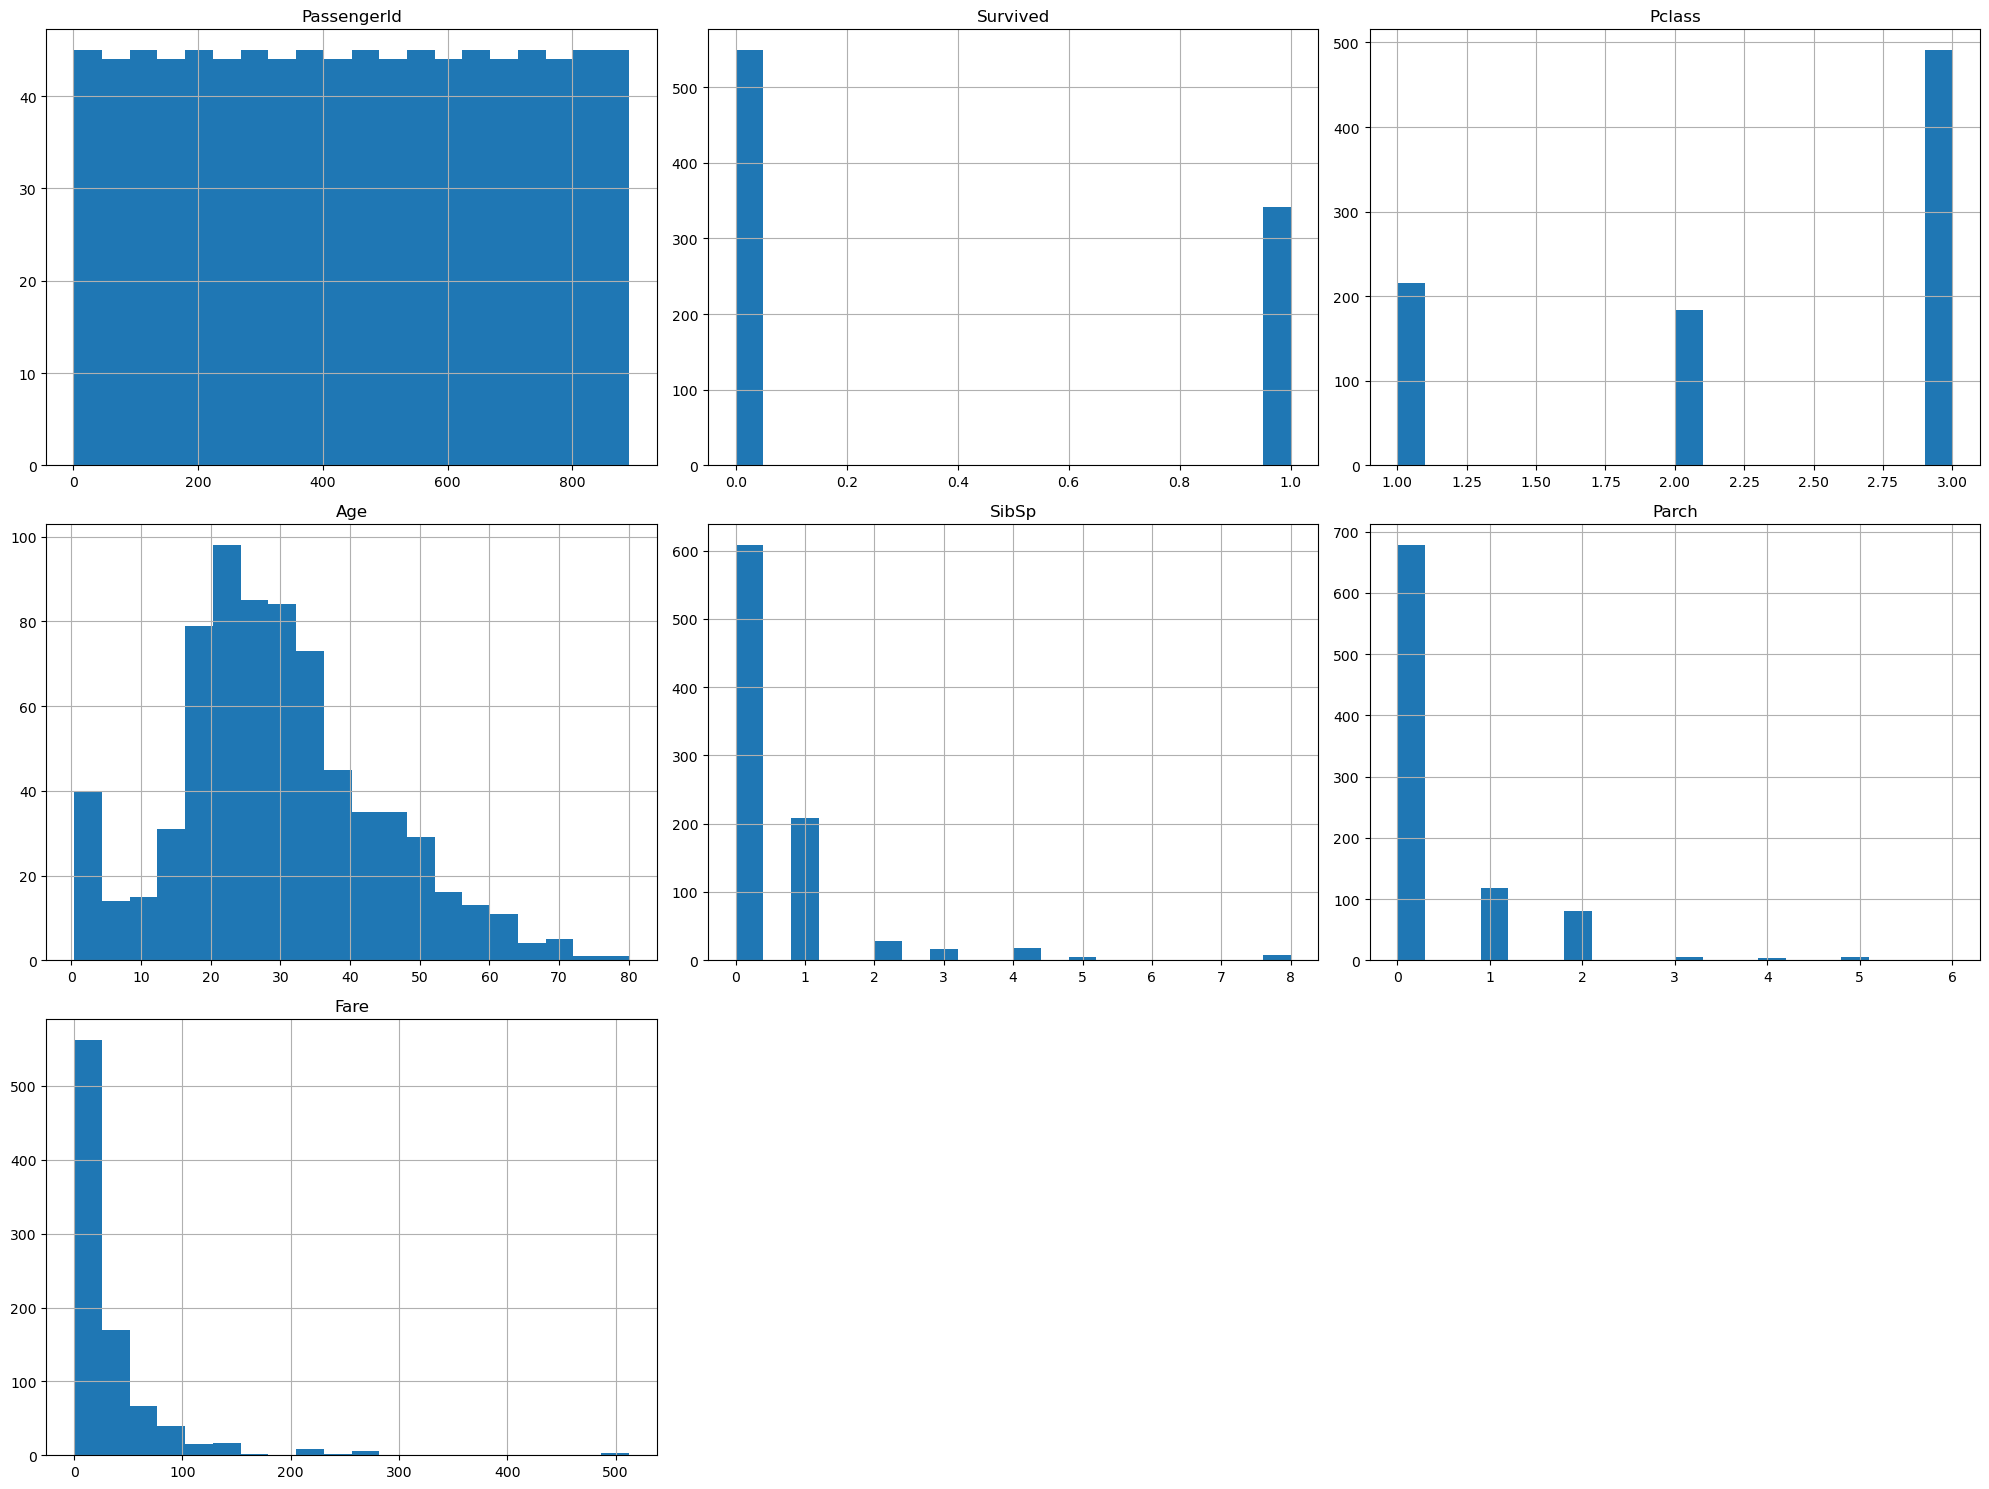

In [6]:

# Step 8: Plot Histograms for Numeric Columns
print("\nPlotting Histograms...")
numeric_columns = data_bu.select_dtypes(include=[np.number]).columns
data_bu[numeric_columns].hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()



Plotting Boxplots and Removing Outliers...


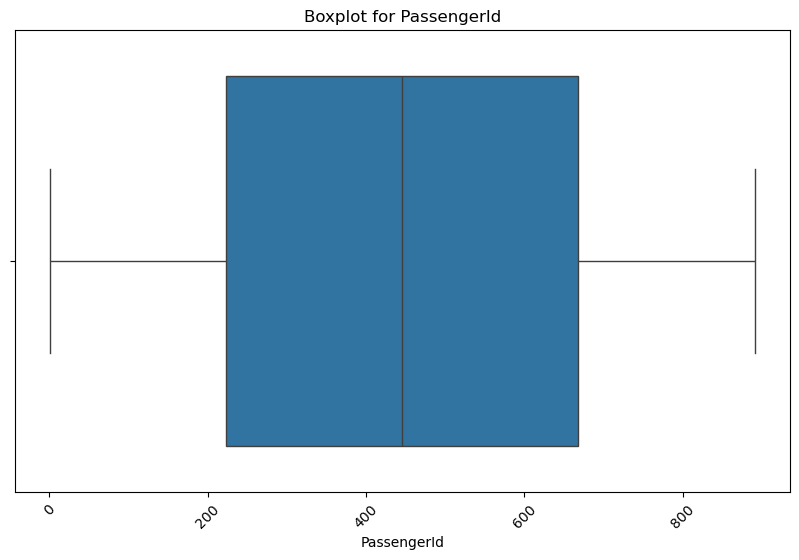

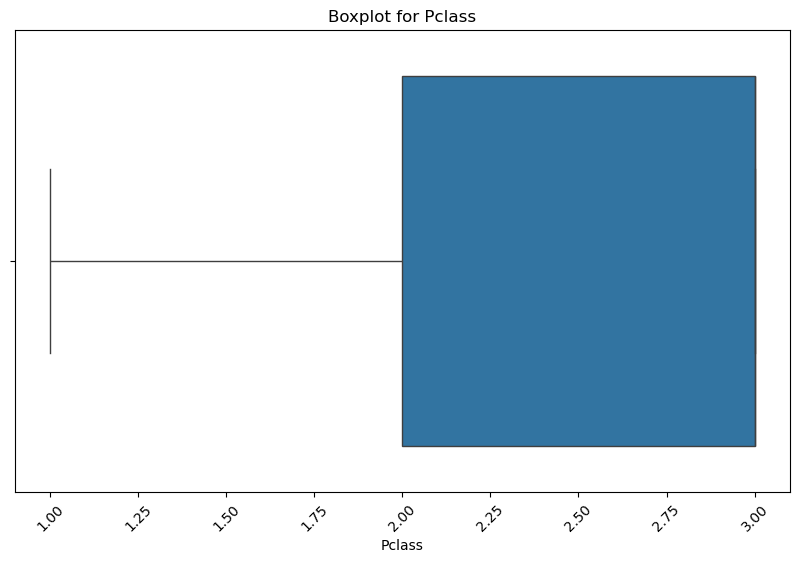

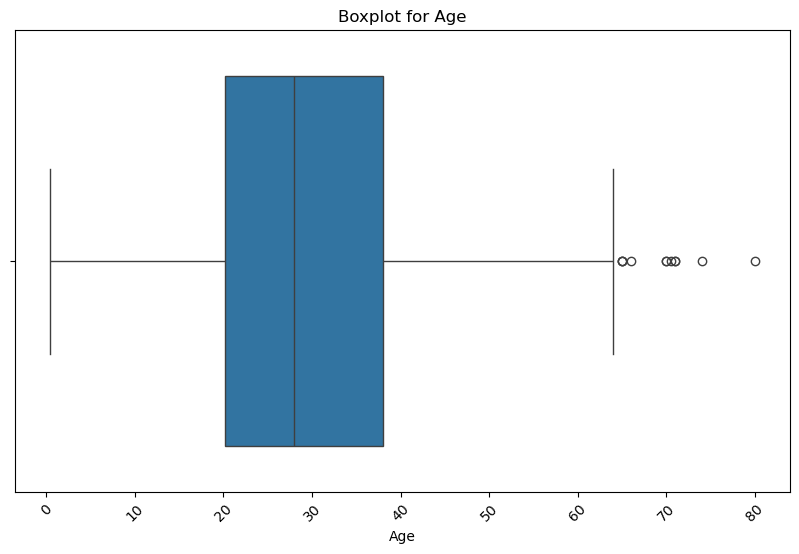

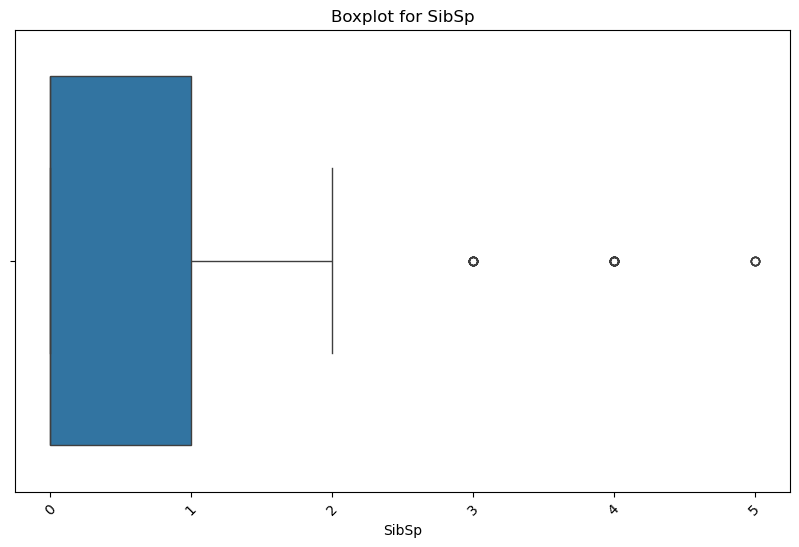

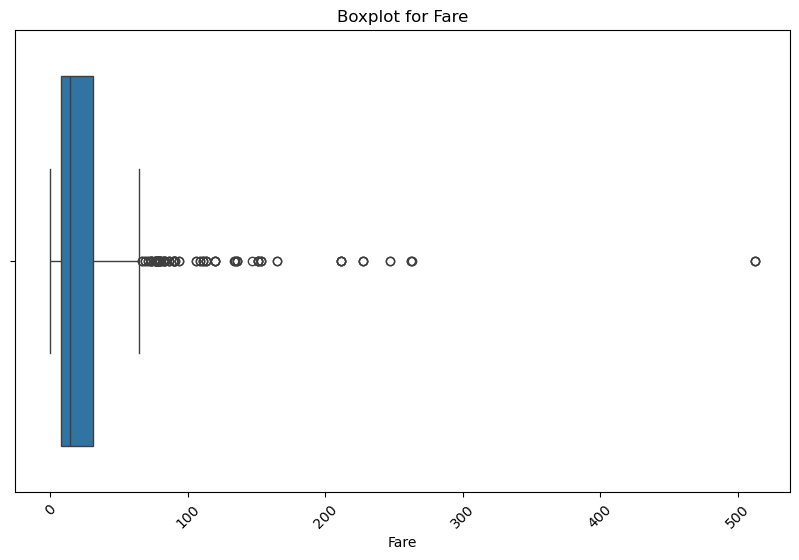


Dataset after removing outliers:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   571.000000  571.000000  571.000000  571.000000  571.000000   
mean    454.273205    0.369527    2.413310   29.365587    0.306480   
std     260.422064    0.483100    0.735633   12.876033    0.525434   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     220.500000    0.000000    2.000000   21.000000    0.000000   
50%     451.000000    0.000000    3.000000   28.000000    0.000000   
75%     685.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   64.000000    2.000000   

            Parch        Fare  
count  571.000000  571.000000  
mean     0.345009   17.865499  
std      0.824018   13.473748  
min      0.000000    0.000000  
25%      0.000000    7.925000  
50%      0.000000   13.000000  
75%      0.000000   26.000000  
max      6.000000   65.000000  


In [23]:
# Step 9: Boxplots for Numeric Columns Only (excluding 'Survived' and 'Parch')
print("\nPlotting Boxplots and Removing Outliers...")
numeric_columns_excluding_survived = numeric_columns.drop(['Survived', 'Parch'])

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in numeric_columns_excluding_survived:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_bu[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()
    
    # Remove outliers
    data_bu = remove_outliers(data_bu, col)

# Display the dataset after removing outliers
print("\nDataset after removing outliers:")
print(data_bu.describe())


Data after removing duplicates based on 'Name':
(571, 12)

Plotting Countplots...


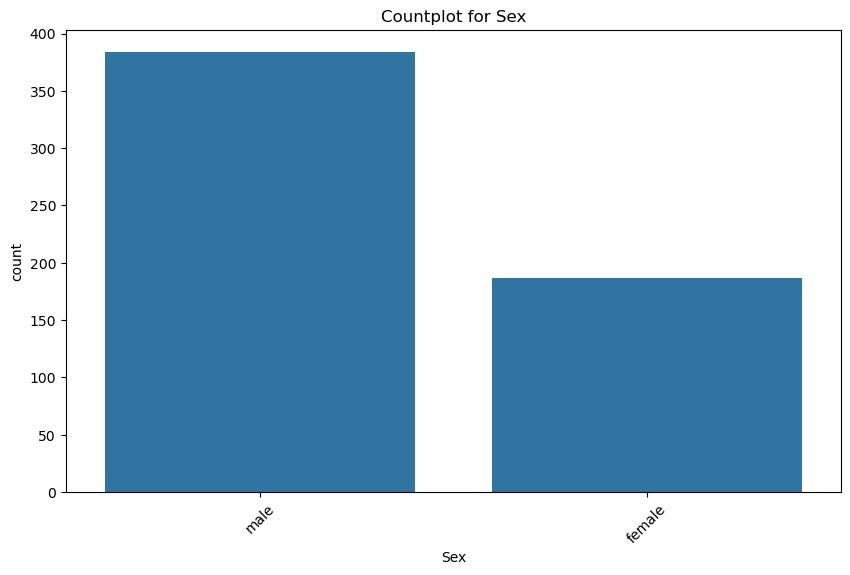

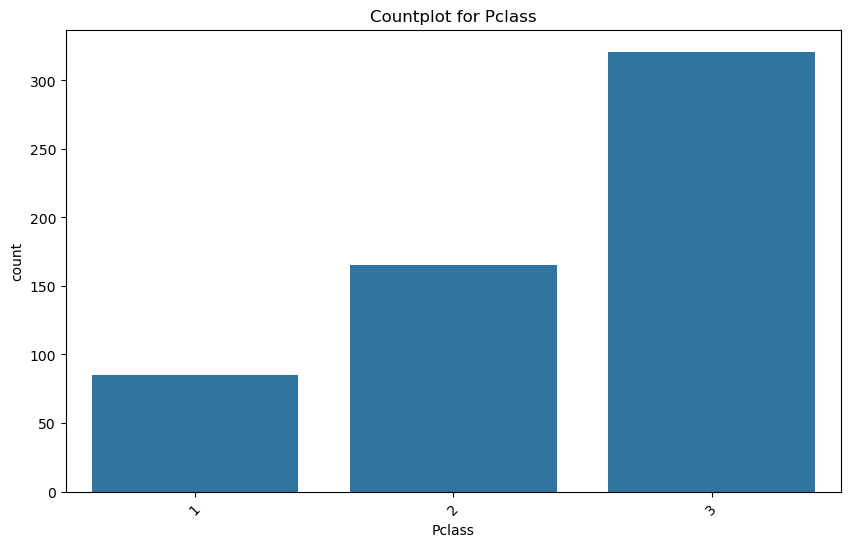

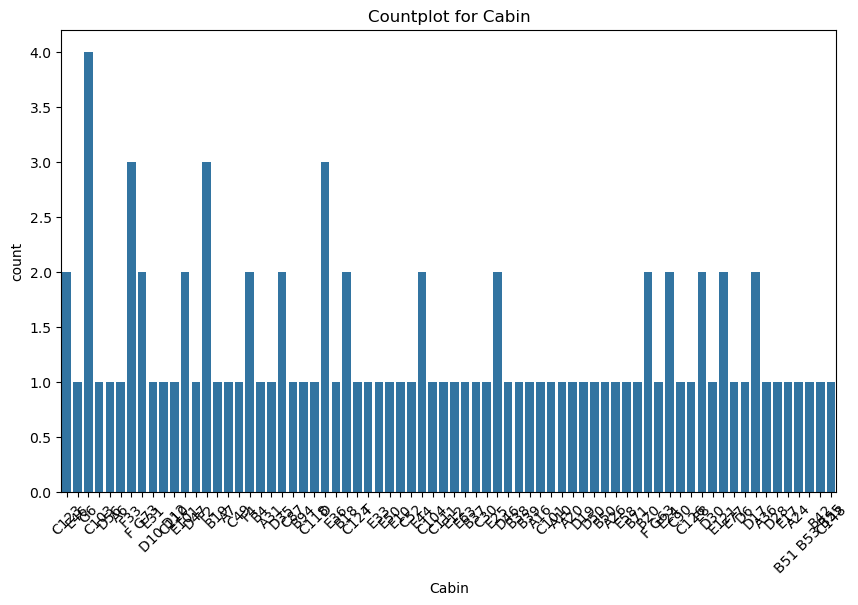

In [29]:
# Step 11: Remove Duplicates
# Remove duplicates based on 'Name' column
data = data_bu.drop_duplicates(subset='Name')
print("\nData after removing duplicates based on 'Name':")
print(data.shape)

# Plot countplots for categorical columns
print("\nPlotting Countplots...")
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()
